# **Libraries & Connection to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates
!pip install pandas-profiling==3.0.0

# **Assign each data set to a table**

In [ ]:
# Excel file path
file_path = "/content/drive/MyDrive/applied data science research project/2324RX19_Project_Data.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

In [ ]:
# Create separate dataframes for each sheet
# Load the Excel file, specifying that dashes "-" should be interpreted as NaN
company_data = pd.read_excel(file_path, sheet_name='01.COMPANY', na_values='—')
investment_data = pd.read_excel(file_path, sheet_name='02.INVESTMENT', na_values='—')
acquisition_data = pd.read_excel(xls, '03.ACQUISITION', na_values='—')
employee_data = pd.read_excel(xls, '04.EMPLOYEE')
news_data = pd.read_excel(xls, '05.NEWS')

# **01. COMPANY PREPROCESSING**

In [ ]:
# Show basic information of company_data
print("\nSheet: 01.COMPANY")

# Transpose and describe the company_data
transposed_company_data_description = company_data.describe().transpose()

# Add the data types to the transposed table
transposed_company_data_description['Data Type'] = company_data.dtypes

# Convert the transposed description to a pretty table
table = tabulate(transposed_company_data_description, headers='keys', tablefmt='pretty')

# Number of variables
num_variables = len(company_data.columns)

# Number of records
num_records = len(company_data)

# Null values
null_counts = company_data.isnull().sum()
null_values_table = tabulate(pd.DataFrame(null_counts, columns=['Null Count']), headers=['Variable', 'Null Count'], tablefmt='grid')

# Print the tables
print(table)

print("Number of variables:", num_variables)

print("Number of records:", num_records)

print("Null values:")
print(null_values_table)


Sheet: 01.COMPANY
+--------------+-------+--------+------------------------------------------+------+-----------+
|              | count | unique |                   top                    | freq | Data Type |
+--------------+-------+--------+------------------------------------------+------+-----------+
|  COMPANY_ID  | 9971  |  9971  |                  drift                   |  1   |  object   |
| COMPANY_NAME | 9971  |  9971  |                  Drift                   |  1   |  object   |
|   CATEGORY   | 9948  |  8695  |   Health Care, Medical, Medical Device   |  27  |  object   |
|   LOCATION   | 9938  |  1682  | San Francisco, California, United States | 789  |  object   |
|  FOUNDED_ON  | 9971  |  1237  |                   2014                   | 1201 |  object   |
|  EXITED_ON   | 1481  |  1060  |               Jun 20, 2018               |  7   |  object   |
|  CLOSED_ON   |  431  |  188   |                   2020                   |  83  |  object   |
+--------------+-----

In [ ]:
# Display detailed information of the DataFrame
print("\nDetailed information of the DataFrame:")
print(company_data.info())


Detailed information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COMPANY_ID    9971 non-null   object
 1   COMPANY_NAME  9971 non-null   object
 2   CATEGORY      9948 non-null   object
 3   LOCATION      9938 non-null   object
 4   FOUNDED_ON    9971 non-null   object
 5   EXITED_ON     1481 non-null   object
 6   CLOSED_ON     431 non-null    object
dtypes: object(7)
memory usage: 545.4+ KB
None


# **02. INVESTMENT PREPROCESSING**

In [ ]:
from tabulate import tabulate

# Show basic information of investment_data
print("\nSheet: 02.INVESTMENT")

# Transpose and describe the investment_data
transposed_investment_data_description = investment_data.describe().transpose()

# Add the data types to the transposed table
transposed_investment_data_description['Data Type'] = investment_data.dtypes

# Convert the transposed description to a pretty table
table = tabulate(transposed_investment_data_description, headers='keys', tablefmt='pretty')

# Print the pretty table



# Number of variables
num_variables = len(investment_data.columns)

# Number of records
num_records = len(investment_data)

# Null values
null_counts = investment_data.isnull().sum()
null_values_table = tabulate(pd.DataFrame(null_counts, columns=['Null Count']), headers=['Variable', 'Null Count'], tablefmt='grid')

# Statistical description
statistical_description_table = tabulate(investment_data.describe().transpose(), headers='keys', tablefmt='grid')

# Print the tables
print(table)
print("Number of variables:", num_variables)
print("Number of records:", num_records)
print("Null values:")
print(null_values_table)


Sheet: 02.INVESTMENT
+------------------+-------+--------+-------------+------+-----------+
|                  | count | unique |     top     | freq | Data Type |
+------------------+-------+--------+-------------+------+-----------+
|    COMPANY_ID    | 19789 |  8648  |   suncayr   |  23  |  object   |
|   FUNDING_TYPE   | 19789 |   27   |    Seed     | 6939 |  object   |
|  ANNOUNCED_DATE  | 19789 |  3100  | Jan 1, 2016 | 137  |  object   |
| INVESTMENT_STAGE | 13502 |   4    |    Seed     | 8446 |  object   |
|   MONEY_RAISED   | 14770 |  3659  | $1,000,000  | 437  |  object   |
+------------------+-------+--------+-------------+------+-----------+
Number of variables: 5
Number of records: 19789
Null values:
+------------------+--------------+
| Variable         |   Null Count |
+==================+==============+
| COMPANY_ID       |            0 |
+------------------+--------------+
| FUNDING_TYPE     |            0 |
+------------------+--------------+
| ANNOUNCED_DATE   |      

In [ ]:
# Frequency of each FUNDING_TYPE
funding_type_counts = investment_data['FUNDING_TYPE'].value_counts()

print("Frequency of each FUNDING_TYPE:")
print(funding_type_counts)

Frequency of each FUNDING_TYPE:
Seed                        6939
Series A                    2632
Venture - Series Unknown    2562
Series B                    1410
Angel                        918
Grant                        761
Debt Financing               684
Convertible Note             675
Pre-Seed                     589
Series C                     552
Non-equity Assistance        394
Funding Round                326
Equity Crowdfunding          310
Post-IPO Equity              244
Series D                     219
Private Equity               153
Corporate Round              116
Product Crowdfunding          90
Series E                      65
Post-IPO Debt                 62
Secondary Market              40
Initial Coin Offering         16
Series F                      14
Post-IPO Secondary             7
Series G                       6
Series H                       4
Series J                       1
Name: FUNDING_TYPE, dtype: int64


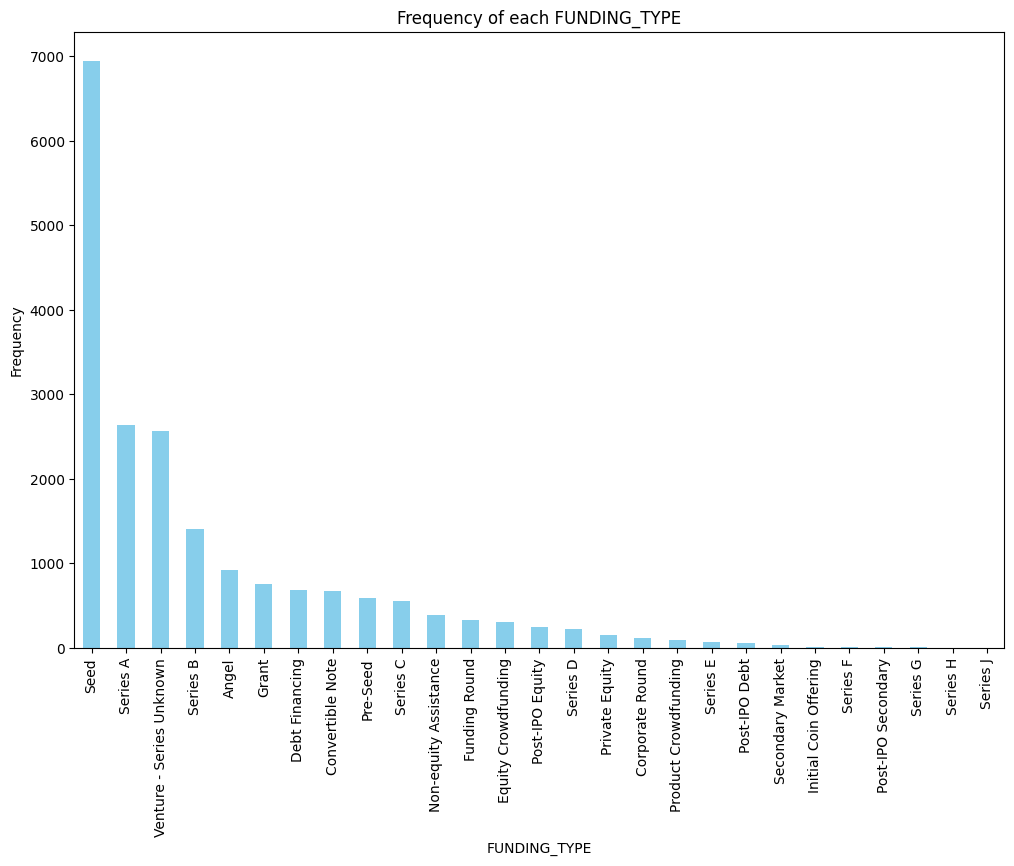

In [ ]:
# Frequency of each FUNDING_TYPE plot
funding_type_counts = investment_data['FUNDING_TYPE'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 8))
funding_type_counts.plot(kind='bar', color='skyblue')

# Set the title and axis labels
plt.title('Frequency of each FUNDING_TYPE')
plt.xlabel('FUNDING_TYPE')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

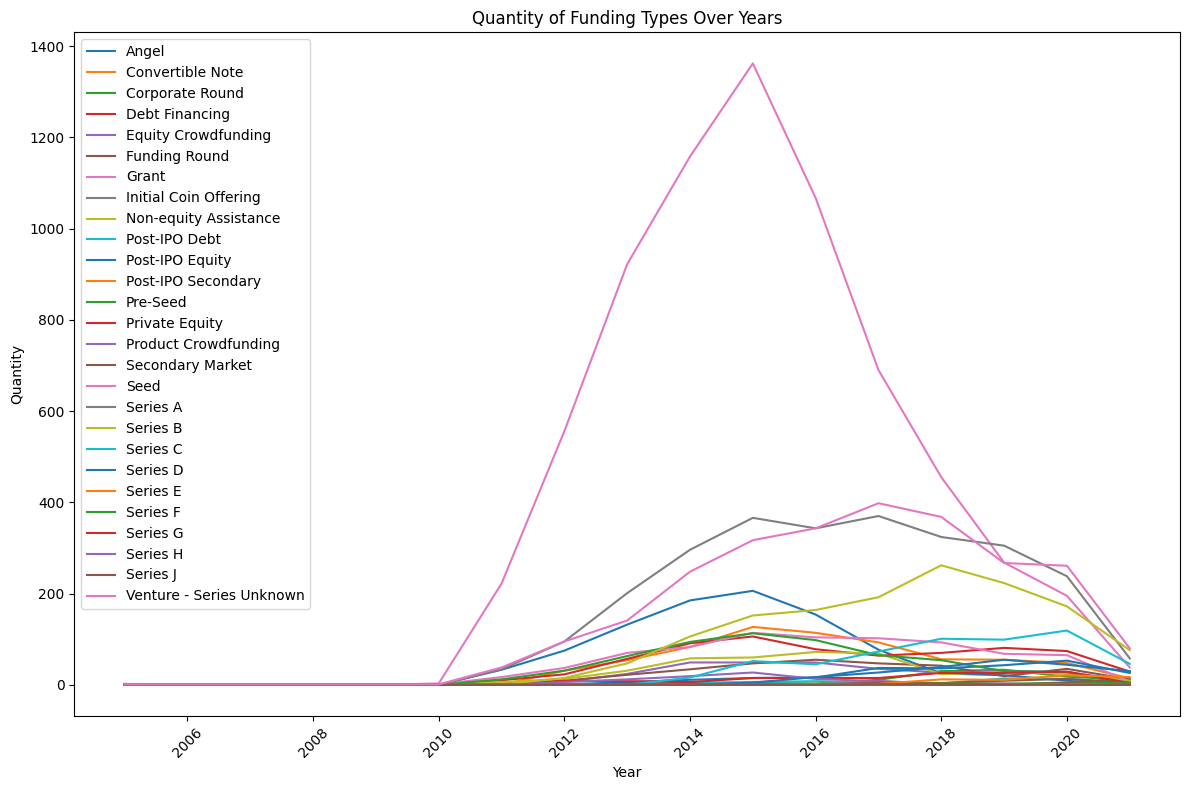

In [ ]:
# Convert 'ANNOUNCED_DATE' column to datetime
investment_data['ANNOUNCED_DATE'] = pd.to_datetime(investment_data['ANNOUNCED_DATE'])

# Extract year from 'ANNOUNCED_DATE'
investment_data['Year'] = investment_data['ANNOUNCED_DATE'].dt.year

# Group data by 'Year' and 'FUNDING_TYPE'
grouped_data = investment_data.groupby(['Year', 'FUNDING_TYPE']).size().unstack(fill_value=0)

# Plot each group separately
plt.figure(figsize=(12, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity of Funding Types Over Years')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Count the frequency of each INVESTMENT_STAGE, including NaN
investment_stage_counts = investment_data['INVESTMENT_STAGE'].value_counts(dropna=False)

print("Frequency of each INVESTMENT_STAGE (including NaN):")
print(investment_stage_counts)

Frequency of each INVESTMENT_STAGE (including NaN):
Seed                   8446
NaN                    6287
Early Stage Venture    4042
Late Stage Venture      861
Private Equity          153
Name: INVESTMENT_STAGE, dtype: int64


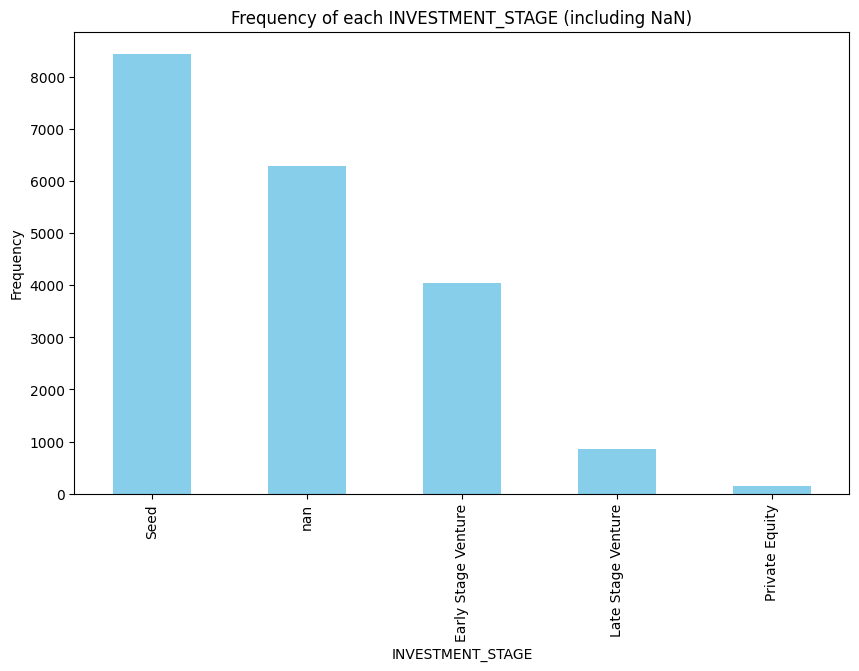

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
investment_stage_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Frequency of each INVESTMENT_STAGE (including NaN)')
plt.xlabel('INVESTMENT_STAGE')
plt.ylabel('Frequency')

# Show the plot
plt.show()

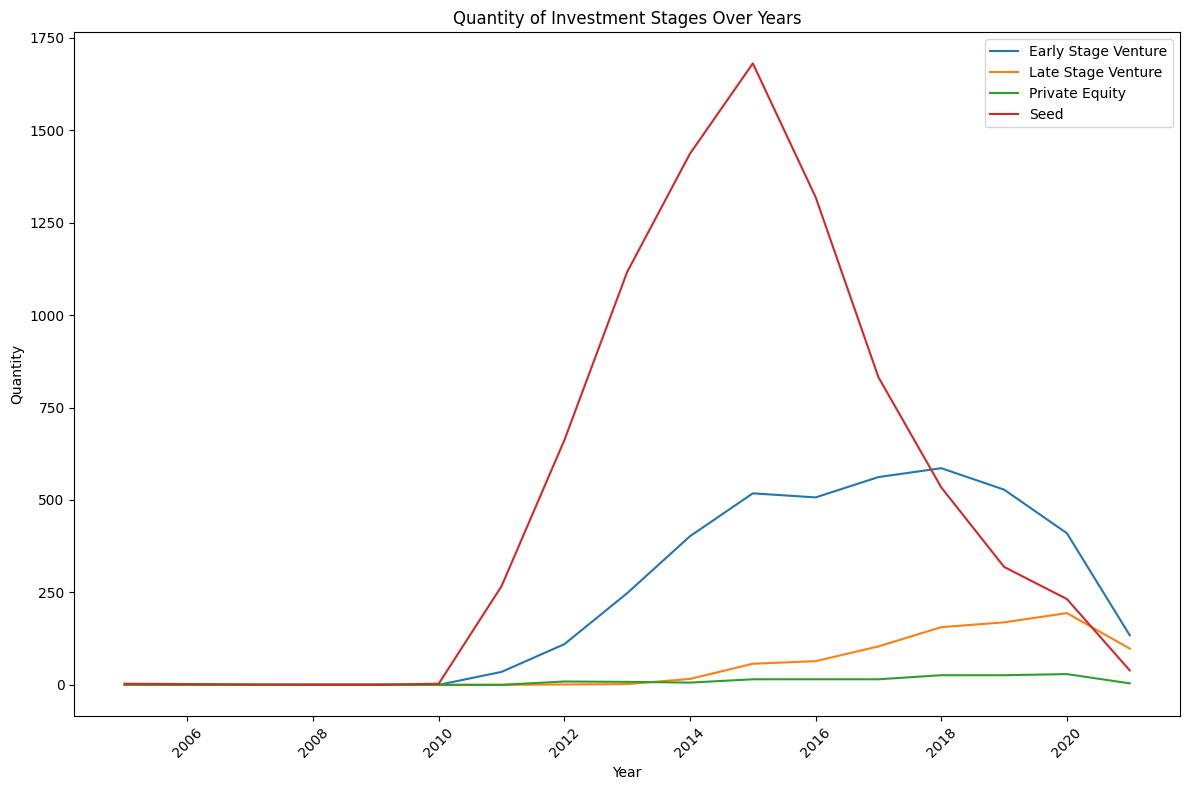

In [ ]:
# Convert 'ANNOUNCED_DATE' column to datetime
investment_data['ANNOUNCED_DATE'] = pd.to_datetime(investment_data['ANNOUNCED_DATE'])

# Extract year from 'ANNOUNCED_DATE'
investment_data['Year'] = investment_data['ANNOUNCED_DATE'].dt.year

# Group data by 'Year' and 'INVESTMENT_STAGE'
grouped_data = investment_data.groupby(['Year', 'INVESTMENT_STAGE']).size().unstack(fill_value=0)

# Plot each group separately
plt.figure(figsize=(12, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity of Investment Stages Over Years')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **03. ACQUISITION PREPROCESSING**

In [ ]:
# Show basic information of the ACQUISITION sheet
print("\nSheet: 03.ACQUISITION")

# Describe and transpose acquisition_data
acquisition_description = acquisition_data.describe().transpose()

# Add data types to the description
acquisition_description['Data Type'] = acquisition_data.dtypes

# Convert the transposed description to a table
table = tabulate(acquisition_description, headers='keys', tablefmt='pretty')

# Print the table
print(table)

# Number of variables
print("Number of Variables:", len(acquisition_data.columns))

# Number of records
print("Number of Records:", len(acquisition_data))

# Null values
null_counts = acquisition_data.isnull().sum()

# Create a summary table for null values
summary_table = []
for column, null_count in null_counts.items():
    summary_table.append([column, null_count])

# Convert the summary table to a table
table2 = tabulate(summary_table, headers=['Variable', 'Null Count'], tablefmt='pretty')

# Print the table
print(table2)


Sheet: 03.ACQUISITION
+------------------+-------+--------+----------------------------+------+-----------+
|                  | count | unique |            top             | freq | Data Type |
+------------------+-------+--------+----------------------------+------+-----------+
|   ACQUIRER_ID    |  950  |  619   | animoca-brands-corporation |  11  |  object   |
|   ACQUIREE_ID    |  950  |  948   |   lyf-food-technologies    |  2   |  object   |
|  ANNOUNCED_DATE  |  950  |  741   |        Feb 1, 2017         |  4   |  object   |
| ACQUISITION_TYPE |  877  |   4    |        Acquisition         | 821  |  object   |
|      PRICE       |  118  |  104   |         $2,000,000         |  4   |  object   |
+------------------+-------+--------+----------------------------+------+-----------+
Number of Variables: 5
Number of Records: 950
+------------------+------------+
|     Variable     | Null Count |
+------------------+------------+
|   ACQUIRER_ID    |     0      |
|   ACQUIREE_ID    | 

In [ ]:
# Count the occurrences of each ACQUISITION_TYPE, including null values
acquisition_type_counts = acquisition_data['ACQUISITION_TYPE'].value_counts(dropna=False)

print("Count of each ACQUISITION_TYPE (including null values):")
print(acquisition_type_counts)

Count of each ACQUISITION_TYPE (including null values):
Acquisition         821
NaN                  73
Merger               39
Acquihire            13
Leveraged Buyout      4
Name: ACQUISITION_TYPE, dtype: int64


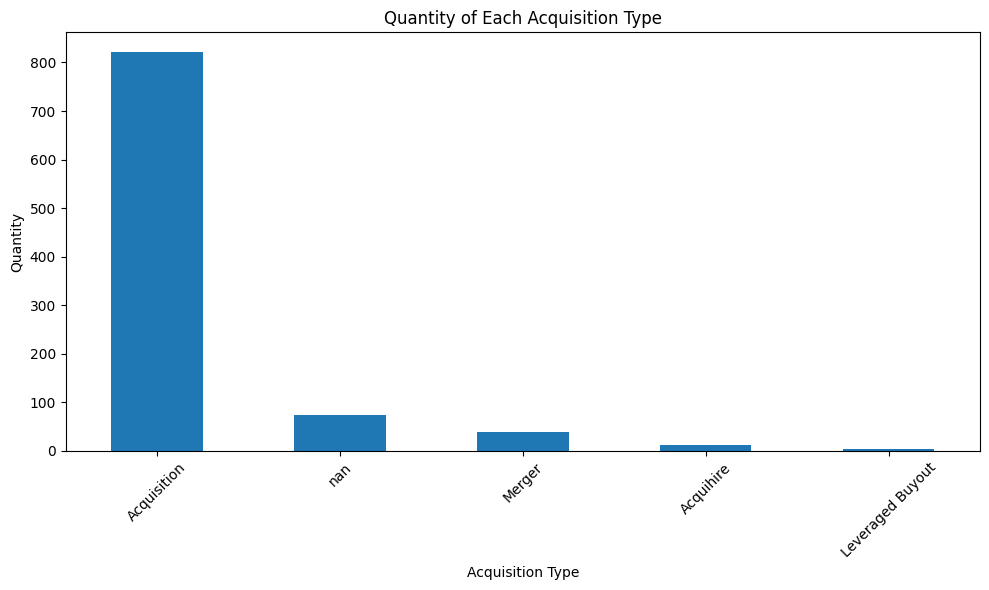

In [ ]:
# Create a bar chart for the quantities of each ACQUISITION_TYPE
plt.figure(figsize=(10, 6))
acquisition_type_counts.plot(kind='bar')
plt.title('Quantity of Each Acquisition Type')
plt.xlabel('Acquisition Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

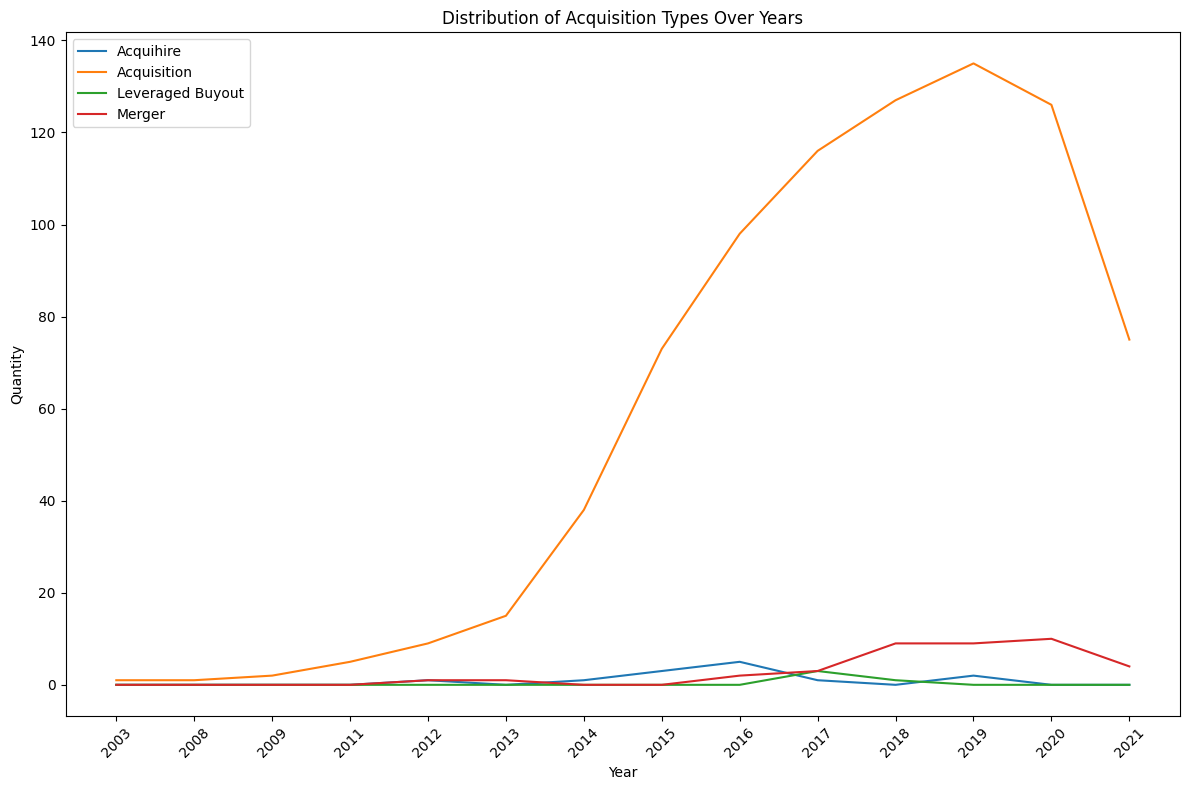

In [ ]:
# Convert the 'ANNOUNCED_DATE' column to datetime
acquisition_data['ANNOUNCED_DATE'] = pd.to_datetime(acquisition_data['ANNOUNCED_DATE'])

# Extract the year from 'ANNOUNCED_DATE'
acquisition_data['Year'] = acquisition_data['ANNOUNCED_DATE'].dt.year

# Round the years to integers
acquisition_data['Year'] = acquisition_data['Year'].astype(int).astype(str)

# Group data by 'Year' and 'ACQUISITION_TYPE'
grouped_data = acquisition_data.groupby(['Year', 'ACQUISITION_TYPE']).size().unstack(fill_value=0)

# Plot the graph
plt.figure(figsize=(12, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Distribution of Acquisition Types Over Years')
plt.legend()

# Show the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **04. EMPLOYEE PREPROCESSING**

In [ ]:
# Show basic information of the EMPLOYEE sheet
print("\nSheet: 04. EMPLOYEE")

# Descriptive statistics
employee_description = employee_data.describe().transpose()
employee_description['Data Type'] = employee_data.dtypes

# Convert the description to a pretty table
descriptive_table = tabulate(employee_description, headers='keys', tablefmt='pretty')

# Null values
null_counts = employee_data.isnull().sum()

# Create a summary table for null values
null_summary_table = []
for column, null_count in null_counts.items():
    null_summary_table.append([column, null_count])

# Convert the summary table to a pretty table
null_table = tabulate(null_summary_table, headers=['Variable', 'Null Count'], tablefmt='pretty')

# Print tables
print(descriptive_table)

# Number of variables
print("Number of Variables:", len(employee_data.columns))

# Number of records
print("Number of Records:", len(employee_data))

print("\nNull Values:")
print(null_table)


Sheet: 04. EMPLOYEE
+------------------+-------+--------+---------------------+------+-----------+
|                  | count | unique |         top         | freq | Data Type |
+------------------+-------+--------+---------------------+------+-----------+
|   COMPANY_IDS    | 20515 |  9736  |      oculus-vr      |  40  |  object   |
|    JOB_TITLES    | 20515 |  6232  |       Founder       | 1014 |  object   |
| ATTENDED_SCHOOLS | 7628  |  3321  | Stanford University | 130  |  object   |
+------------------+-------+--------+---------------------+------+-----------+
Number of Variables: 3
Number of Records: 20515

Null Values:
+------------------+------------+
|     Variable     | Null Count |
+------------------+------------+
|   COMPANY_IDS    |     0      |
|    JOB_TITLES    |     0      |
| ATTENDED_SCHOOLS |   12887    |
+------------------+------------+


# **05. NEWS PREPROCESSING**

In [ ]:
# Show basic information of the NEWS sheet
print("\nSheet: 05. NEWS")

# Descriptive statistics
news_description = news_data.describe().transpose()

# Convert the description to a pretty table
descriptive_table = tabulate(news_description, headers='keys', tablefmt='pretty')

# Null values
null_counts = news_data.isnull().sum()

# Create a summary table for null values with data type
null_summary_table = []
for column, null_count in null_counts.items():
    data_type = news_data[column].dtype
    null_summary_table.append([column, null_count, data_type])

# Convert the summary table to a pretty table
null_table = tabulate(null_summary_table, headers=['Variable', 'Null Count', 'Data Type'], tablefmt='pretty')

# Print both tables
print(descriptive_table)

# Number of variables
print("Number of Variables:", len(news_data.columns))

# Number of records
print("Number of Records:", len(news_data))

print("\nNull Values:")
print(null_table)


Sheet: 05. NEWS
+------------+-------+--------+---------------------------------------------------------------------------------------------------+------+
|            | count | unique |                                                top                                                | freq |
+------------+-------+--------+---------------------------------------------------------------------------------------------------+------+
| COMPANY_ID | 25497 |  5273  |                                            cresco-labs                                            |  41  |
| NEWS_DATE  | 25497 |  3472  |                                           Sep 13, 2021                                            |  39  |
| NEWS_VENUE | 24186 |  4133  |                                            TechCrunch                                             | 1279 |
| NEWS_TITLE | 25465 | 24950  | Alkami Announces Acquisition of Digital Account Opening and Loan Origination Provider MK Decision |  24  |
+---------

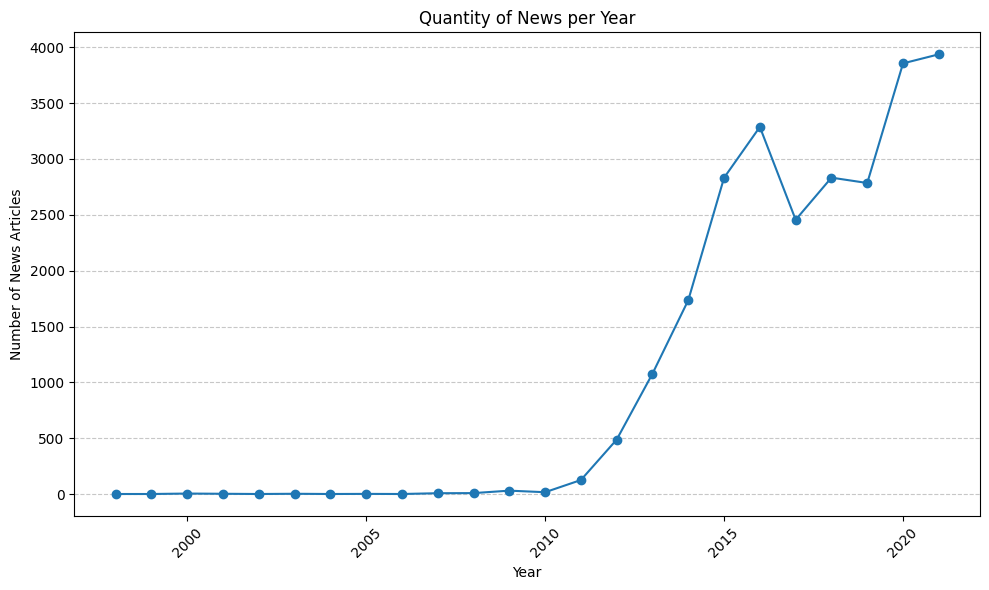

In [ ]:
# Convert 'NEWS_DATE' column to datetime
news_data['NEWS_DATE'] = pd.to_datetime(news_data['NEWS_DATE'])

# Extract year from 'NEWS_DATE'
news_data['Year'] = news_data['NEWS_DATE'].dt.year

# Count number of news articles for each year
news_per_year = news_data['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(news_per_year.index, news_per_year.values, marker='o', linestyle='-')
plt.title('Quantity of News per Year')
plt.xlabel('Year')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'NEWS_DATE' column to datetime
news_data['NEWS_DATE'] = pd.to_datetime(news_data['NEWS_DATE'])

# Extract year from 'NEWS_DATE'
news_data['Year'] = news_data['NEWS_DATE'].dt.year

# Count number of news articles for each year
news_per_year = news_data['Year'].value_counts().sort_index()

# Create a DataFrame to store the results
news_table = pd.DataFrame({
    'Year': news_per_year.index,
    'Number of News Articles': news_per_year.values
})

# Display the table
print(news_table)

    Year  Number of News Articles
0   1998                        1
1   1999                        1
2   2000                        5
3   2001                        3
4   2002                        1
5   2003                        3
6   2004                        1
7   2005                        2
8   2006                        1
9   2007                        8
10  2008                        9
11  2009                       31
12  2010                       17
13  2011                      126
14  2012                      488
15  2013                     1078
16  2014                     1736
17  2015                     2832
18  2016                     3287
19  2017                     2456
20  2018                     2833
21  2019                     2785
22  2020                     3856
23  2021                     3937


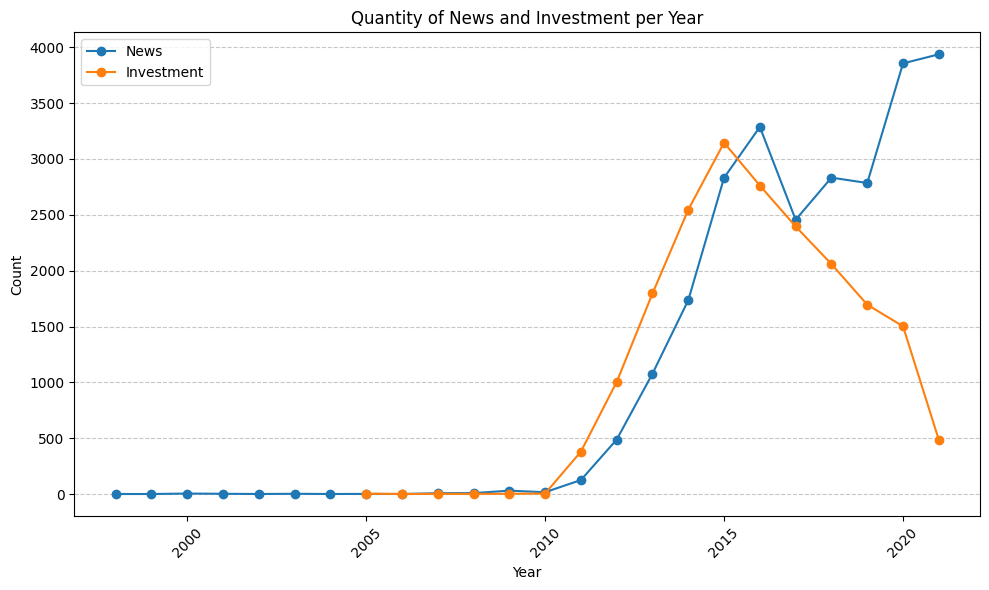

In [ ]:
# Convert 'ANNOUNCED_DATE' column to datetime for investment data
investment_data['ANNOUNCED_DATE'] = pd.to_datetime(investment_data['ANNOUNCED_DATE'])

# Extract year from 'ANNOUNCED_DATE' for investment data
investment_data['Year'] = investment_data['ANNOUNCED_DATE'].dt.year

# Count number of investments for each year
investment_per_year = investment_data['Year'].value_counts().sort_index()

# Count number of news articles for each year (already done)
news_per_year = news_data['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))

# Plot news data
plt.plot(news_per_year.index, news_per_year.values, label='News', marker='o', linestyle='-')

# Plot investment data
plt.plot(investment_per_year.index, investment_per_year.values, label='Investment', marker='o', linestyle='-')

# Set labels and title
plt.title('Quantity of News and Investment per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

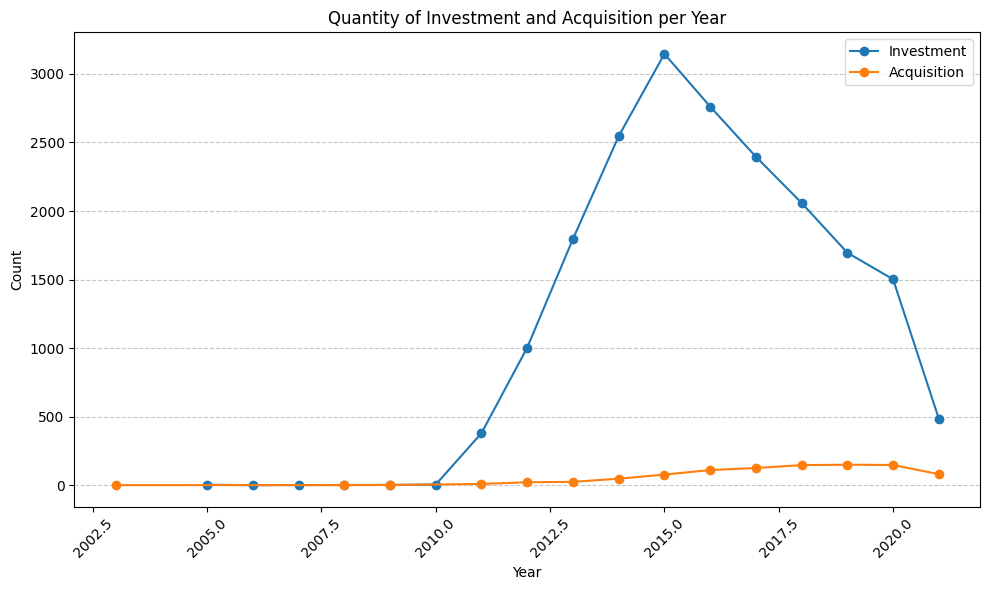

In [ ]:
# Convert 'ANNOUNCED_DATE' column to datetime for investment data
investment_data['ANNOUNCED_DATE'] = pd.to_datetime(investment_data['ANNOUNCED_DATE'])

# Extract year from 'ANNOUNCED_DATE' for investment data
investment_data['Year'] = investment_data['ANNOUNCED_DATE'].dt.year

# Count number of investments for each year
investment_per_year = investment_data['Year'].value_counts().sort_index()

# Convert 'ANNOUNCED_DATE' column to datetime for acquisition data
acquisition_data['ANNOUNCED_DATE'] = pd.to_datetime(acquisition_data['ANNOUNCED_DATE'])

# Extract year from 'ANNOUNCED_DATE' for acquisition data
acquisition_data['Year'] = acquisition_data['ANNOUNCED_DATE'].dt.year

# Count number of acquisitions for each year
acquisition_per_year = acquisition_data['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))

# Plot investment data
plt.plot(investment_per_year.index, investment_per_year.values, label='Investment', marker='o', linestyle='-')

# Plot acquisition data
plt.plot(acquisition_per_year.index, acquisition_per_year.values, label='Acquisition', marker='o', linestyle='-')

# Set labels and title
plt.title('Quantity of Investment and Acquisition per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()